In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image Dimension    :  (400, 400, 3)
Image Height       :  400
Image Width        :  400
Number of Channels :  3


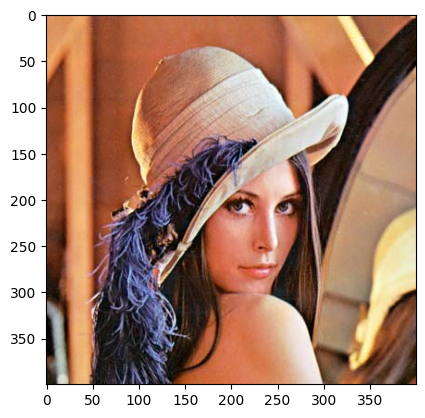

In [18]:
lenna = cv2.imread("Lenna_400.jpg")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB) # cv2.imread -> BGR

height, width, channels = lenna.shape
print('Image Dimension    : ', lenna.shape)
print('Image Height       : ', height)
print('Image Width        : ', width)
print('Number of Channels : ', channels)

plt.imshow(lenna)

## Extract Image information and Image crop with inversion

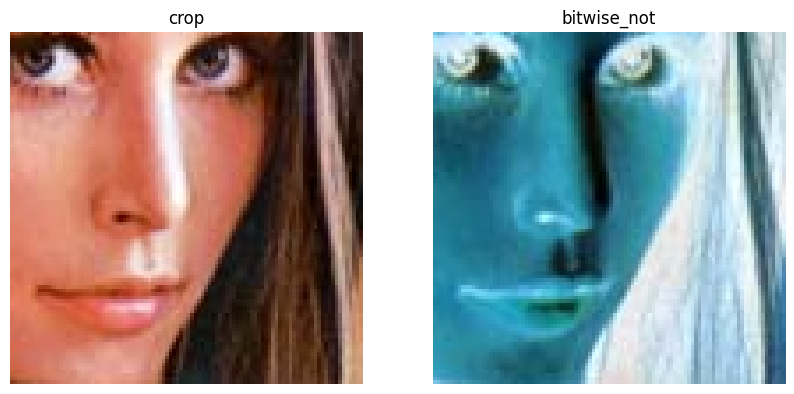

In [3]:
cropped_lenna = lenna[200:300, 200:300]
bitwise_not_lenna = cv2.bitwise_not(cropped_lenna)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(cropped_lenna)
plt.title("crop")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bitwise_not_lenna)
plt.title("bitwise_not")
plt.axis("off")

plt.show()

## Use threshold method

Otsu's threshold value: 112.0


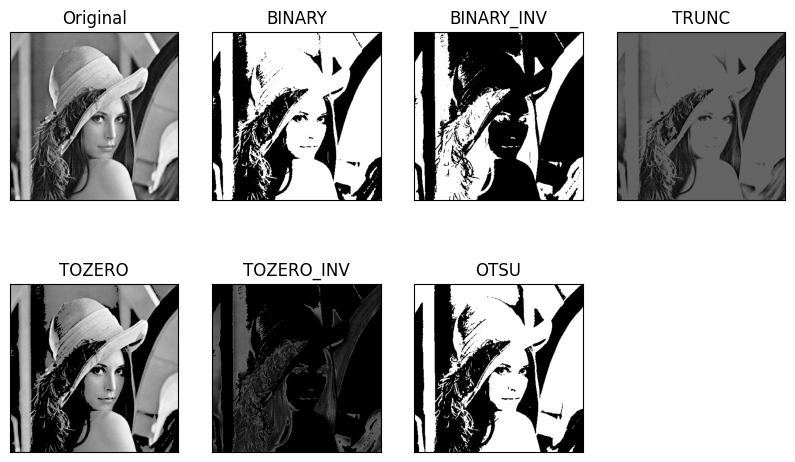

In [36]:
# grayscale image load
gray_lenna = cv2.imread('Lenna_400.jpg', cv2.IMREAD_GRAYSCALE)
    
# retval, thresholded_image = cv2.threshold(src, thresh, maxval, type)
_, t_bin = cv2.threshold(gray_lenna, 100, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(gray_lenna, 100, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(gray_lenna, 100, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(gray_lenna, 100, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(gray_lenna, 100, 255, cv2.THRESH_TOZERO_INV)

# Otsu's Thresholding 적용 (thresh: 0, Otsu 옵션 추가)
otsu_thresh, t_otsu = cv2.threshold(gray_lenna, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# print Otsu's threshold 
print(f"Otsu's threshold value: {otsu_thresh}")

# covert image to numpy array
images = {
    'Original': gray_lenna,
    'BINARY': t_bin,
    'BINARY_INV': t_bininv,
    'TRUNC': t_truc,
    'TOZERO': t_2zr,
    'TOZERO_INV': t_2zrinv,
    'OTSU': t_otsu
}

plt.figure(figsize=(10, 6))
for i, (key, value) in enumerate(images.items()):
    plt.subplot(2, 4, i + 1)
    plt.title(key)
    plt.imshow(value, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]); plt.yticks([])

plt.show()

## use two threshold

(400, 400)


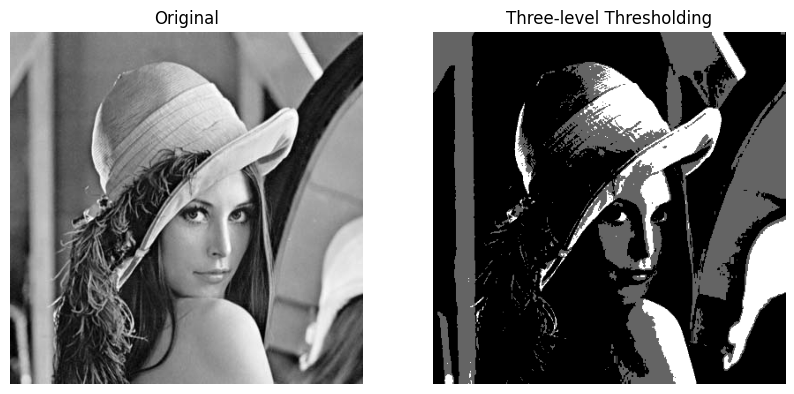

In [56]:
print(gray_lenna.shape)
T = np.zeros_like(gray_lenna)

T[gray_lenna < 150] = 0       # pixel= 0 if pixel value < 150
T[(gray_lenna >= 150) & (gray_lenna < 200)] = 100  # pixel= 100 if 150 <= pixel value < 200
T[gray_lenna >= 200] = 255    # pixel = 255 if pixel >= 200

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(gray_lenna, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(T, cmap="gray")
plt.axis("off")
plt.title("Three-level Thresholding")

plt.show()